## importing different libraries and dataset 

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [3]:
df = pd.read_csv("data/laptop_price.txt")

## Performing data preprocessing

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 12)

In [6]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [9]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*25)

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
*************************
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64
*************************
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64
*************************
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080          

In [10]:
df.duplicated().sum()

29

In [13]:
df[df.duplicated(keep=False)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1172,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1261,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1262,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1263,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1264,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1265,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1266,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


### Data Quality

- No missing value
- duplicated row = 29
- unnecessary column as "Unnamed: 0"
- Need to do feature extraction from column "ScreenResolution"
- make lower unique values for "Cpu" feature
- convert "Ram" to int type
- extract new features from "Memory" as "HDD" & "SSD"
- make lower unique values for "GPU" feature
- make lower unique values for "Operating System" feature
- convert "Weight" to float type

### Preprocessing / cleaning

In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
df.shape

(1274, 11)

In [16]:
# Converting dtypes of Ram & weight
df["Ram"] = df["Ram"].str.replace('GB', '')
df["Weight"] = df["Weight"].str.replace('kg', '')
df["Ram"] = df["Ram"].astype('int32')
df["Weight"] = df["Weight"].astype('float64')

# Making a new column for IPS & touchscreen feature
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x:1 if 'Touchscreen' in x else 0)
df["ips"] = df["ScreenResolution"].apply(lambda x:1 if 'IPS' in x else 0)

# Making a new column for ppi
new = df['ScreenResolution'].str.split('x', n=1, expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df["X_res"] = df["X_res"].astype('int32')
df["Y_res"] = df["Y_res"].astype('int32')

df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

df.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace=True)

# Making separate column for different CPU features
df['Cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['Cpu_brand'] = df['Cpu_name'].apply(fetch_processor)
df.drop(columns=['Cpu', 'Cpu_name'], inplace=True)

# Making new columns for different memory types
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)
df.drop(columns=['Hybrid', 'Flash_Storage', 'Memory'], inplace=True)

# Making separate columns for different GPU
df['Gpu'] = df['Gpu'].apply(lambda x:x.split()[0])
df = df[df['Gpu'] != 'ARM']

# Grouping OS of Window, Mac & Others 
def fetch_os(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'Linux/Others/No OS'
df['os'] = df['OpSys'].apply(fetch_os)
df.drop(columns=['OpSys'], inplace=True)

/tmp/ipykernel_13383/2705153211.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
/tmp/ipykernel_13383/2705153211.py:61: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')
/tmp/ipykernel_13383/2705153211.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(fetch_os)
/tmp/ipykernel_13383/2705153211.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [17]:
df = df.reset_index(drop=True)

### checking cleaned data

In [18]:
df.head()

,Company,TypeName,Ram,Gpu,Weight,Price,Touchscreen,ips,ppi,Cpu_brand,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,Intel,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Mac
2,HP,Notebook,8,Intel,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Linux/Others/No OS
3,Apple,Ultrabook,16,AMD,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,Intel,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Mac


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int32  
 3   Gpu          1273 non-null   object 
 4   Weight       1273 non-null   float64
 5   Price        1273 non-null   float64
 6   Touchscreen  1273 non-null   int64  
 7   ips          1273 non-null   int64  
 8   ppi          1273 non-null   float64
 9   Cpu_brand    1273 non-null   object 
 10  HDD          1273 non-null   int64  
 11  SSD          1273 non-null   int64  
 12  os           1273 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 124.4+ KB


# Performing EDA

<Axes: >

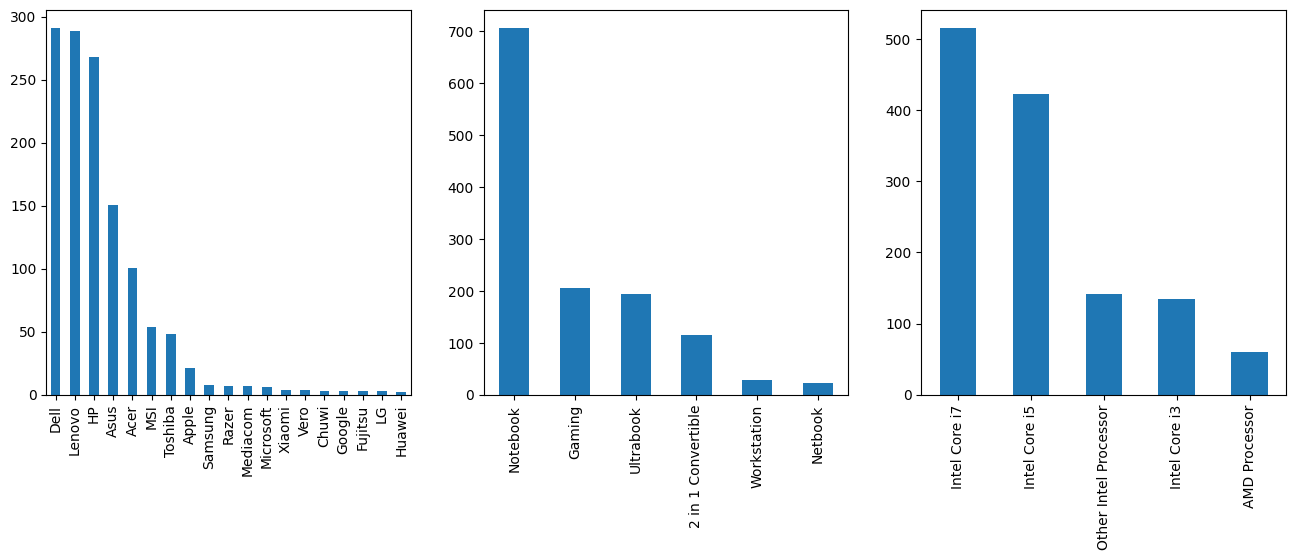

In [20]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
df["Company"].value_counts().plot(kind='bar')
plt.subplot(1, 3, 2)
df["TypeName"].value_counts().plot(kind='bar')
plt.subplot(1, 3, 3)
df["Cpu_brand"].value_counts().plot(kind='bar')

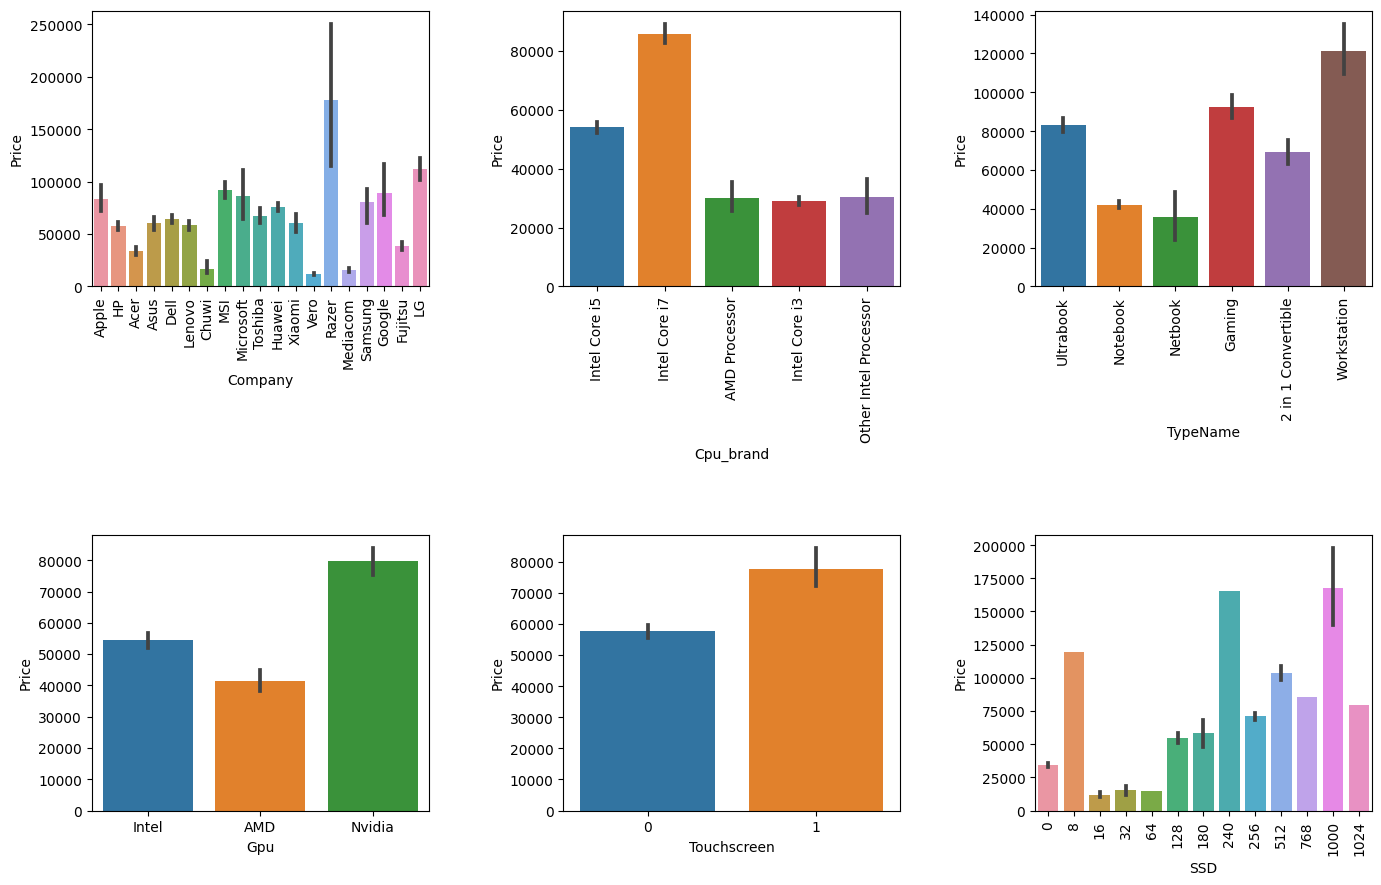

In [21]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
sns.barplot(x=df["Company"], y=df["Price"])
plt.xticks(rotation='vertical')
plt.subplot(2, 3, 2)
sns.barplot(x=df["Cpu_brand"], y=df["Price"])
plt.xticks(rotation='vertical')
plt.subplot(2, 3, 3)
sns.barplot(x=df["TypeName"], y=df["Price"])
plt.xticks(rotation='vertical')
plt.subplot(2, 3, 4)
sns.barplot(x=df["Gpu"], y=df["Price"])
plt.subplot(2, 3, 5)
sns.barplot(x=df["Touchscreen"], y=df["Price"])
plt.subplot(2, 3, 6)
sns.barplot(x=df["SSD"], y=df["Price"])
plt.xticks(rotation='vertical')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)

### Spotting outliers

<Axes: >

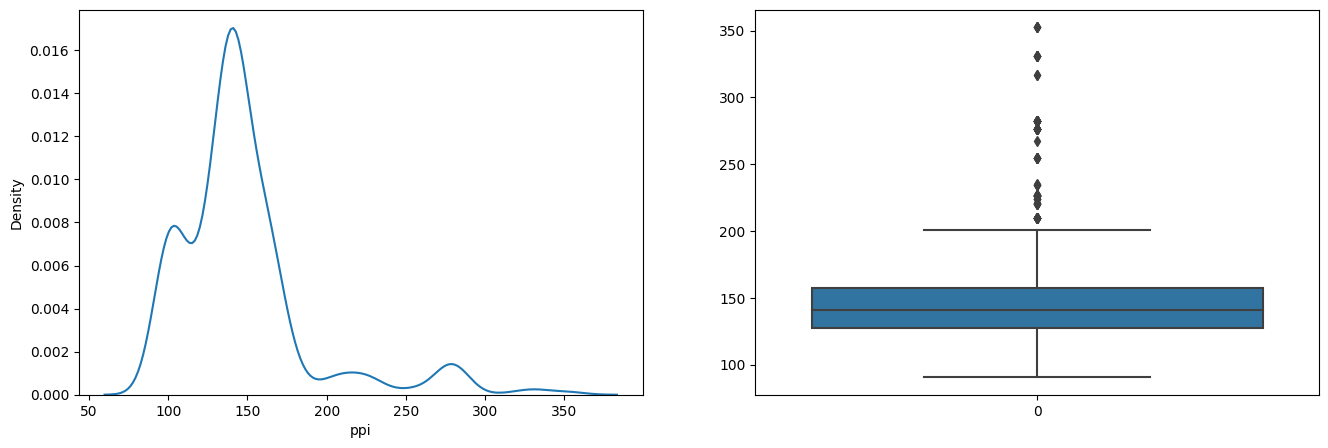

In [22]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(df['ppi'])
plt.subplot(1, 2, 2)
sns.boxplot(df['ppi'])

<Axes: >

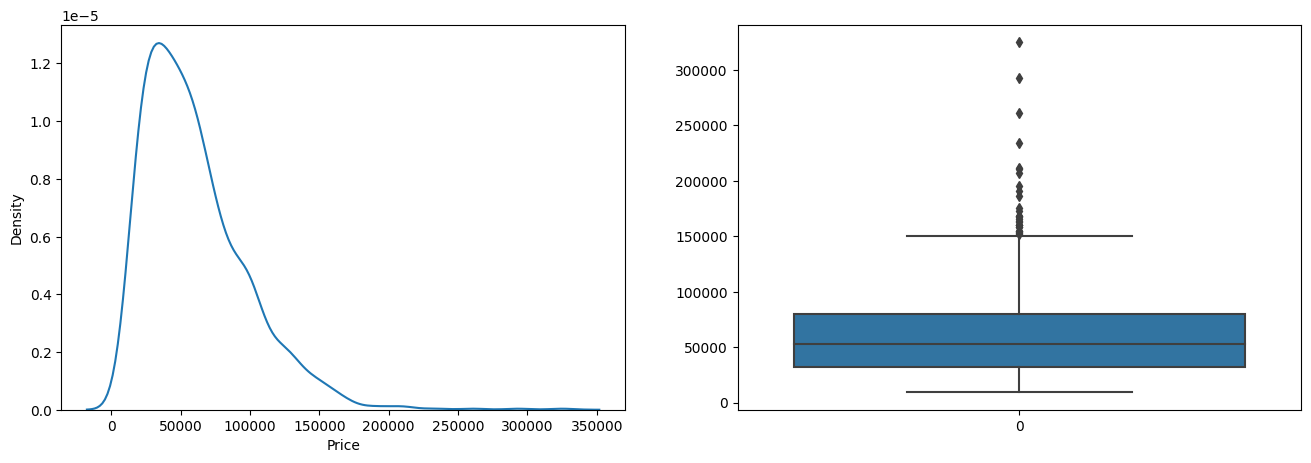

In [23]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(df['Price'])
plt.subplot(1, 2, 2)
sns.boxplot(df['Price'])

In [24]:
upper_limit = 200000
df[df['Price'] > upper_limit]

,Company,TypeName,Ram,Gpu,Weight,Price,Touchscreen,ips,ppi,Cpu_brand,HDD,SSD,os
196,Razer,Gaming,32,Nvidia,3.49,324954.720,1,0,254.671349,Intel Core i7,0,1000,Windows
238,Asus,Gaming,32,Nvidia,4.70,207259.200,0,0,127.335675,Intel Core i7,1000,512,Windows
610,Lenovo,Notebook,32,Nvidia,2.50,261018.720,0,1,282.423996,Other Intel Processor,0,1000,Windows
749,HP,Workstation,16,Nvidia,3.00,233845.920,0,1,127.335675,Other Intel Processor,0,256,Windows
830,Razer,Gaming,32,Nvidia,3.49,292986.720,1,0,254.671349,Intel Core i7,0,512,Windows
1066,Asus,Gaming,64,Nvidia,3.58,211788.000,0,1,127.335675,Intel Core i7,0,1000,Windows
1136,HP,Workstation,8,Nvidia,3.00,210424.032,0,1,127.335675,Intel Core i7,0,256,Windows


In [25]:
df = df[df['Price'] < upper_limit]

In [33]:
X

,Company,TypeName,Ram,Gpu,Weight,Touchscreen,ips,ppi,Cpu_brand,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,Intel,1.34,0,0,127.677940,Intel Core i5,0,0,Mac
2,HP,Notebook,8,Intel,1.86,0,0,141.211998,Intel Core i5,0,256,Linux/Others/No OS
3,Apple,Ultrabook,16,AMD,1.83,0,1,220.534624,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Intel Core i5,0,256,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,Nvidia,2.20,0,0,100.454670,Intel Core i7,500,0,Windows
1269,Lenovo,2 in 1 Convertible,4,Intel,1.80,1,1,157.350512,Intel Core i7,0,128,Windows
1270,Lenovo,2 in 1 Convertible,16,Intel,1.30,1,1,276.053530,Intel Core i7,0,512,Windows
1271,Lenovo,Notebook,2,Intel,1.50,0,0,111.935204,Other Intel Processor,0,0,Windows


# Training first model

In [34]:
# Making test & train Sample
X = df.drop(columns=['Price'])
y = np.log(df['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

# Transforming catagorical column using pipeline
transformer = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, handle_unknown = 'ignore'), [0, 1, 3, 8, 11])
], remainder='passthrough')

model = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

pipe = make_pipeline(transformer, model)

pipe.fit(X, y)

/home/shekhar/ml_projects/price_prediction/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 11])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

## Making prediction and evaluating

In [29]:
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(np.exp(y_test), np.exp(y_pred)))

R2 score 0.8745511798863866
MAE 10228.315688604578


### Finding the best model

In [42]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR

#creating train & test data
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

models = {'Linear Regression':LinearRegression(),
          'Random Forrest':RandomForestRegressor(n_estimators=100,
                                random_state=3,
                                max_samples=0.7,
                                max_features=0.75,
                                max_depth=15),
          'Lasso': Lasso(),
          'SVR':SVR()

}
model_names = []
performances = []
mean = []

for model in tqdm(list(models.keys())):
    # print(model)
    # print(models[model])
    transformer = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, handle_unknown = 'ignore'), [0, 1, 3, 8, 11])], remainder='passthrough')

    ml_model = models[model]

    pipe = make_pipeline(transformer, ml_model)
    
    scores = cross_val_score(pipe, X, y, cv = 5, scoring = 'r2')
    model_names.append(model)
    performances.append(scores)
    mean.append(scores.mean())

    dic = {'model_name':model_names,
        'r2_scores': performances,
        'mean_r2':mean}

    model_performance = pd.DataFrame(dic)
        

100%|██████████| 4/4 [00:04<00:00,  1.14s/it]


In [43]:
model_performance

,model_name,r2_scores,mean_r2
0,Linear Regression,"[-3.216417504159515e+17, 0.831761968821385, 0....",-6.432835e+16
1,Random Forrest,"[0.8181893061019063, 0.8944259934424896, 0.884...",8.580089e-01
2,Lasso,"[0.4650760808514751, 0.4925528323723256, 0.513...",4.665160e-01
3,SVR,"[0.4685350567934876, 0.6798074537297543, 0.655...",5.610402e-01


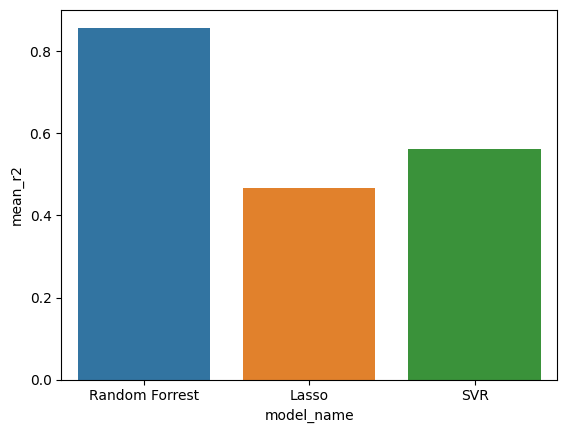

In [44]:
sns.barplot(x=model_performance['model_name'][1:], y = model_performance['mean_r2'][1:])
plt.show()

## Training optimized model

In [45]:
 #Making test & train Sample
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

# Transforming catagorical column using pipeline
transformer = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, handle_unknown = 'ignore'), [0, 1, 3, 8, 11])
], remainder='passthrough')

model= RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

pipe = make_pipeline(transformer, model)

pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 3, 8, 11])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

## making prediction with new model

In [46]:
X

,Company,TypeName,Ram,Gpu,Weight,Touchscreen,ips,ppi,Cpu_brand,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,Intel,1.34,0,0,127.677940,Intel Core i5,0,0,Mac
2,HP,Notebook,8,Intel,1.86,0,0,141.211998,Intel Core i5,0,256,Linux/Others/No OS
3,Apple,Ultrabook,16,AMD,1.83,0,1,220.534624,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Intel Core i5,0,256,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,Nvidia,2.20,0,0,100.454670,Intel Core i7,500,0,Windows
1269,Lenovo,2 in 1 Convertible,4,Intel,1.80,1,1,157.350512,Intel Core i7,0,128,Windows
1270,Lenovo,2 in 1 Convertible,16,Intel,1.30,1,1,276.053530,Intel Core i7,0,512,Windows
1271,Lenovo,Notebook,2,Intel,1.50,0,0,111.935204,Other Intel Processor,0,0,Windows


### taking first row for prediction

In [52]:
y_pred = pipe.predict(pd.DataFrame(columns=['Company', 'TypeName', 'Ram', 'Gpu', 'Weight', 'Touchscreen', 'ips', 'ppi', 'Cpu_brand', 'HDD', 'SSD', 'os'],data=np.array(['Apple', 'Ultrabook', 8, 'Intel', 1.37, 0, 1, 226, 'Intel Core i5', 0, 128, 'Mac']).reshape(1, 12)))


In [57]:
np.exp(y_pred)[0]

71079.07691484179

In [58]:
np.exp(y)[0]

71378.68320000001

It is a almost close value. So the model is performing well

### Exporting the Model for deployment purpose


In [59]:
df.to_csv('data/clean_laptop.csv')

In [60]:
import pickle
# pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('data/pipe.pkl', 'wb'))
